In [122]:
from intake import open_catalog
from datetime import date
import numpy as np
import pandas as pd
import scipy.io
import gsw
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
fn1 = '/home/jovyan/RCLVs/SCS/eds_28d.mat'
data1 = scipy.io.loadmat(fn1)

fn2 = '/home/jovyan/RCLVs/SCS/eds_28d_trk.mat'
data2 = scipy.io.loadmat(fn2)

fn3 = '/home/jovyan/RCLVs/SCS/t_eddy.mat'
data3 = scipy.io.loadmat(fn3)

In [175]:
edgespd_var = data2['eds_28d_trk'][i, 0]['edgespd_ave'][0]
edgespd = np.array([tmp[0] for tmp in edgespd_var])
edgespd

array([[0.28079211],
       [0.3049439 ],
       [0.30965178],
       [0.32150815],
       [0.31778013],
       [0.33613153],
       [0.36761664],
       [0.38345976],
       [0.40178958],
       [0.43732392],
       [0.4388661 ],
       [0.43854593],
       [0.43774244],
       [0.44086767],
       [0.45605291],
       [0.46799176],
       [0.49453378],
       [0.52457597],
       [0.54707389],
       [0.54971772],
       [0.55111309],
       [0.54680377],
       [0.55149325],
       [0.54947282],
       [0.54253098],
       [0.54083748],
       [0.54964102],
       [0.54675222],
       [0.54752743],
       [0.53309516],
       [0.50648073],
       [0.50149281],
       [0.51717578],
       [0.55214059],
       [0.5601596 ],
       [0.56570932],
       [0.57490024],
       [0.57132738],
       [0.55573297],
       [0.54329204],
       [0.55020632],
       [0.54233183],
       [0.52322027],
       [0.49929367],
       [0.48116263],
       [0.46529897],
       [0.44514458],
       [0.414

In [180]:
cols=['id', 'date_start', 'date_end', 'duration', 'time', 'amplitude', 'area', 'radius', 'cyc', 'vorticity', 'boundary', 'center_traj', 'dx', 'speed_x', 'dy', 'speed_y', 'edgespd', 'KE']
df = pd.DataFrame(columns=cols)

for i in np.arange(1999):

    time_var = data2['eds_28d_trk'][i, 0]['time'][0, :]
    time = np.array([float(tmp) for tmp in time_var])
    tt0, tt1 = time[0], time[-1]
    dt = tt1 - tt0 + 1
    
    amp_var = data2['eds_28d_trk'][i, 0]['amplitude'][0, :]
    amp = np.array([float(tmp) for tmp in amp_var])
    area_var = data2['eds_28d_trk'][i, 0]['area'][0, :]
    area = np.array([float(tmp) for tmp in area_var])
    
    rad = np.sqrt(area / np.pi)
    
    vort_var = data2['eds_28d_trk'][i, 0]['vorticity'][0, :]
    vort = np.array([float(tmp) for tmp in vort_var])
    
    if vort.mean() > 0:
        cyc = 1
    else:
        cyc = -1
    
    boun = data2['eds_28d_trk'][i, 0]['edgeline'][0, :]
    
    center_var = data2['eds_28d_trk'][i, 0]['centerposition'][0]
    center = np.array([tmp[0] for tmp in center_var])
    
    dxstd = gsw.distance([0, 1], [center[0, 1], center[0, 1]])
    dx = dxstd * (center[-1, 0] - center[0, 0])
    speedx = dx / (86400 * dt)
    
    dystd = gsw.distance([center[0, 0], center[0, 0]], [0, 1])
    dy = dystd * (center[-1, 1] - center[0, 1])
    speedy = dy / (86400 * dt)
    
    edgespd_var = data2['eds_28d_trk'][i, 0]['edgespd_ave'][0]
    edgespd = np.array([tmp[0] for tmp in edgespd_var])
    
    mke_var = data2['eds_28d_trk'][i, 0]['mKE'][0]
    mke = np.array([tmp[0] for tmp in mke_var])
    
    data = {'id': i+1,
            'date_start': tt0,
            'date_end': tt1,
            'duration': dt,
            'time': time,
            'amplitude': amp,
            'area': area,
            'radius': rad,
            'cyc': cyc,
            'vorticity': vort,
            'boundary': boun,
            'center_traj': center,
            'dx': dx,
            'speed_x': speedx,
            'dy': dy,
            'speed_y': speedy,
            'edgespd': edgespd,
            'KE': mke
            }
    df = df.append(data, ignore_index=True)

df.to_csv('ssh_eddy.csv', index=False)
    
#plt.hist(lifespan, bins=30)

In [177]:
df.head()

,id,date_start,date_end,duration,time,amplitude,area,radius,cyc,vorticity,boundary,center_traj,dx,speed_x,dy,speed_y,edgespd,KE
0,1,727951.0,727978.0,28.0,"[727951.0, 727952.0, 727953.0, 727954.0, 72795...","[-0.007712499999999983, -0.012131249999999968,...","[5455659440.894975, 8121446992.162614, 9907658...","[41672.41696480782, 50844.241244441546, 56157....",1,"[6.471079552603794e-06, 6.805875491400245e-06,...","[[[115.375, 115.625, 115.875, 116.125, 116.375...","[[115.875, 11.625], [115.875, 11.625], [115.62...",[-108913.97563481628],[-0.0450206579178308],[-305786.04827253654],[-0.12639965619731172],"[[0.13423669025789728], [0.17275709113497995],...","[[0.00470504440386122], [0.0110756746073456], ..."
1,2,727930.0,727978.0,49.0,"[727930.0, 727931.0, 727932.0, 727933.0, 72793...","[0.12278125000000001, 0.12778125, 0.1111187500...","[43276528576.180664, 43680949487.472404, 40409...","[117368.4237157236, 117915.5547828922, 113414....",-1,"[-5.640043829890309e-06, -5.616555549326674e-0...","[[[124.625, 124.57964887467716, 124.4362843058...","[[123.875, 20.125], [123.625, 20.125], [123.62...",[-391521.2849715277],[-0.09247951742524747],[222389.85328911748],[0.05252972725083085],"[[0.35392920090606994], [0.35248223420933167],...","[[0.04716042555755491], [0.044965167776585616]..."
2,3,727949.0,727982.0,34.0,"[727949.0, 727950.0, 727951.0, 727952.0, 72795...","[-0.009506249999999994, -0.021681249999999958,...","[6225675790.247264, 14753222515.156181, 180200...","[44516.22347201959, 68528.07147179543, 75736.2...",1,"[4.68624181126097e-06, 3.770623531094761e-06, ...","[[[118.375, 118.43338213762812, 118.6062312312...","[[118.875, 15.125], [118.875, 14.875], [118.62...",[-134178.6453078576],[-0.04567628176329575],[-55597.46332227937],[-0.018926151730078764],"[[0.12680375962826826], [0.15216259040720712],...","[[0.005702614188653442], [0.007613075801210582..."
3,4,727930.0,727985.0,56.0,"[727930.0, 727931.0, 727932.0, 727933.0, 72793...","[-0.0871875, -0.08626249999999999, -0.08258125...","[67125493398.966774, 62211634673.84232, 585548...","[146173.55494020082, 140721.63427255355, 13652...",1,"[4.7278965368901895e-06, 4.9974122119023494e-0...","[[[111.125, 111.375, 111.46845281638625, 111.6...","[[112.375, 9.625], [112.375, 9.625], [112.375,...",[-328888.84920378035],[-0.0679747125503845],[-138993.65830569842],[-0.02872719459029812],"[[0.37031183174407534], [0.37156503420446724],...","[[0.05419673412000216], [0.056296501822538224]..."
4,5,727944.0,727987.0,44.0,"[727944.0, 727945.0, 727946.0, 727947.0, 72794...","[0.007575000000000001, 0.012012500000000004, 0...","[8655732881.93327, 12941267500.89676, 15738534...","[52490.04999507501, 64182.03319687245, 70779.4...",-1,"[-4.21671231468934e-06, -4.214128511382315e-06...","[[[114.125, 114.27886710239652, 114.375, 114.6...","[[114.375, 10.375], [114.375, 10.375], [114.12...",[-164065.2907899769],[-0.0431569051951749],[-83396.19498341906],[-0.021937130414409475],"[[0.1075870142422782], [0.13724410868079404], ...","[[0.004261353721842516], [0.006642737660652458..."


(array([ 10.,  22.,  46.,  64.,  74., 102., 106., 127., 131., 135., 110.,
        128., 115., 117., 125.,  92.,  87.,  86.,  83.,  47.,  47.,  42.,
         37.,  18.,  18.,  13.,   7.,   4.,   3.,   3.]),
 array([ 39322.27602649,  43245.1308577 ,  47167.98568891,  51090.84052012,
         55013.69535133,  58936.55018255,  62859.40501376,  66782.25984497,
         70705.11467618,  74627.96950739,  78550.82433861,  82473.67916982,
         86396.53400103,  90319.38883224,  94242.24366345,  98165.09849467,
        102087.95332588, 106010.80815709, 109933.6629883 , 113856.51781952,
        117779.37265073, 121702.22748194, 125625.08231315, 129547.93714436,
        133470.79197558, 137393.64680679, 141316.501638  , 145239.35646921,
        149162.21130042, 153085.06613164, 157007.92096285]),
 <BarContainer object of 30 artists>)

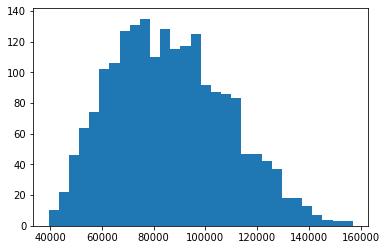

In [166]:
plt.hist([data.mean() for data in df.radius], bins=30)

(array([  1.,   1.,   0.,   4.,   4.,   7.,  12.,  14.,  24.,  38.,  50.,
         98., 162., 214., 220., 217.,  11., 104., 233., 201., 115., 101.,
         81.,  38.,  21.,   9.,   9.,   6.,   2.,   2.]),
 array([-0.24367969, -0.22912523, -0.21457077, -0.20001631, -0.18546186,
        -0.1709074 , -0.15635294, -0.14179848, -0.12724403, -0.11268957,
        -0.09813511, -0.08358065, -0.0690262 , -0.05447174, -0.03991728,
        -0.02536282, -0.01080837,  0.00374609,  0.01830055,  0.03285501,
         0.04740946,  0.06196392,  0.07651838,  0.09107284,  0.10562729,
         0.12018175,  0.13473621,  0.14929067,  0.16384512,  0.17839958,
         0.19295404]),
 <BarContainer object of 30 artists>)

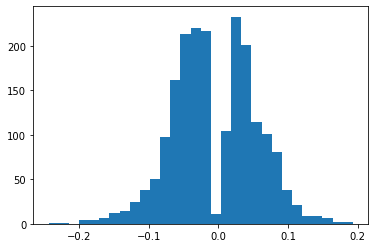

In [167]:
plt.hist([data.mean() for data in df.amplitude], bins=30)

(array([ 922.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1077.]),
 array([-1.0, -0.9333333333333333, -0.8666666666666667, -0.8,
        -0.7333333333333334, -0.6666666666666667, -0.6,
        -0.5333333333333333, -0.4666666666666667, -0.4,
        -0.33333333333333337, -0.2666666666666667, -0.19999999999999996,
        -0.1333333333333333, -0.06666666666666665, 0.0,
        0.06666666666666665, 0.1333333333333333, 0.19999999999999996,
        0.2666666666666666, 0.33333333333333326, 0.3999999999999999,
        0.46666666666666656, 0.5333333333333332, 0.6000000000000001,
        0.6666666666666667, 0.7333333333333334, 0.8, 0.8666666666666667,
        0.9333333333333333, 1.0], dtype=object),
 <BarContainer object of 30 artists>)

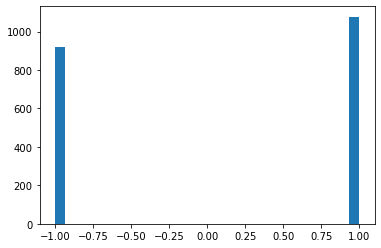

In [168]:
plt.hist(df.cyc, bins=30)

(array([633., 396., 206., 191., 124.,  98.,  77.,  61.,  44.,  38.,  26.,
         23.,  21.,  16.,   9.,  10.,   5.,   2.,   9.,   0.,   3.,   2.,
          2.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([ 28.        ,  39.53333333,  51.06666667,  62.6       ,
         74.13333333,  85.66666667,  97.2       , 108.73333333,
        120.26666667, 131.8       , 143.33333333, 154.86666667,
        166.4       , 177.93333333, 189.46666667, 201.        ,
        212.53333333, 224.06666667, 235.6       , 247.13333333,
        258.66666667, 270.2       , 281.73333333, 293.26666667,
        304.8       , 316.33333333, 327.86666667, 339.4       ,
        350.93333333, 362.46666667, 374.        ]),
 <BarContainer object of 30 artists>)

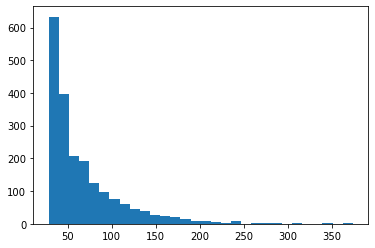

In [169]:
plt.hist(df.duration, bins=30)

(array([  4.,   6.,  20.,  31.,  59., 100., 149., 235., 231.,  83.,   4.,
          0.,   0.,   0.,   2.,  29., 161., 270., 209., 124., 118.,  82.,
         30.,  23.,   9.,   8.,   4.,   2.,   3.,   3.]),
 array([-1.39800009e-05, -1.28826273e-05, -1.17852538e-05, -1.06878802e-05,
        -9.59050666e-06, -8.49313311e-06, -7.39575956e-06, -6.29838601e-06,
        -5.20101246e-06, -4.10363891e-06, -3.00626536e-06, -1.90889181e-06,
        -8.11518260e-07,  2.85855289e-07,  1.38322884e-06,  2.48060239e-06,
         3.57797594e-06,  4.67534949e-06,  5.77272304e-06,  6.87009659e-06,
         7.96747013e-06,  9.06484368e-06,  1.01622172e-05,  1.12595908e-05,
         1.23569643e-05,  1.34543379e-05,  1.45517114e-05,  1.56490850e-05,
         1.67464585e-05,  1.78438321e-05,  1.89412056e-05]),
 <BarContainer object of 30 artists>)

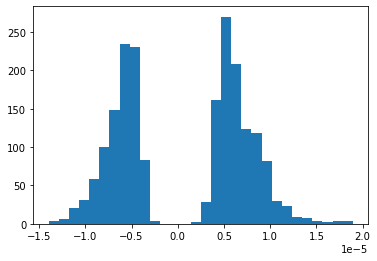

In [171]:
plt.hist([data.mean() for data in df.vorticity], bins=30)

(array([409., 507., 399., 228., 166.,  75.,  57.,  43.,  30.,  31.,  16.,
         12.,   9.,   3.,   3.,   1.,   1.,   2.,   2.,   2.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.00324215, 0.0117558 , 0.02026946, 0.02878311, 0.03729677,
        0.04581042, 0.05432408, 0.06283773, 0.07135139, 0.07986504,
        0.0883787 , 0.09689235, 0.10540601, 0.11391967, 0.12243332,
        0.13094698, 0.13946063, 0.14797429, 0.15648794, 0.1650016 ,
        0.17351525, 0.18202891, 0.19054256, 0.19905622, 0.20756987,
        0.21608353, 0.22459718, 0.23311084, 0.24162449, 0.25013815,
        0.2586518 ]),
 <BarContainer object of 30 artists>)

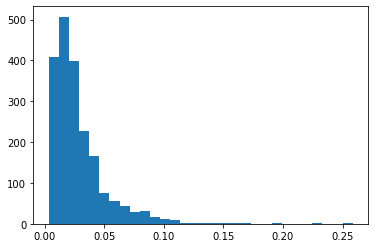

In [178]:
plt.hist([data.mean() for data in df.KE], bins=30)

(array([ 28., 101., 196., 217., 235., 222., 236., 174., 153., 114.,  78.,
         52.,  52.,  40.,  25.,  26.,  16.,  13.,   9.,   2.,   1.,   3.,
          1.,   1.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([0.09358328, 0.11838381, 0.14318434, 0.16798486, 0.19278539,
        0.21758592, 0.24238645, 0.26718697, 0.2919875 , 0.31678803,
        0.34158856, 0.36638908, 0.39118961, 0.41599014, 0.44079067,
        0.46559119, 0.49039172, 0.51519225, 0.53999278, 0.5647933 ,
        0.58959383, 0.61439436, 0.63919489, 0.66399541, 0.68879594,
        0.71359647, 0.738397  , 0.76319752, 0.78799805, 0.81279858,
        0.83759911]),
 <BarContainer object of 30 artists>)

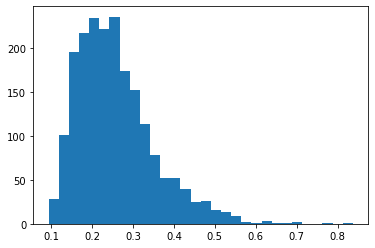

In [179]:
plt.hist([data.mean() for data in df.edgespd], bins=30)

In [ ]:
import os
import sys
import numpy as np
import xarray as xr
from datetime import datetime
from tqdm import tqdm
from floater import rclv_zwd
import pandas as pd
import gsw

# compute eddy area and radius according to different lat
# area: km^2 radius: km
def compute_radius(lat, num):
    lt = np.zeros((36, 2))
    lt[:, 0] = np.arange(0.5, 36, 1)
    lt[:, 1] = np.arange(0.5, 36, 1)
    ln = np.zeros((36, 2))
    for i in np.arange(36):
        ln[i, 0] = 0
        ln[i, 1] = 1
    l1 = gsw.distance(ln, lt, axis=1)
    l2 = gsw.distance(ln, lt, axis=0)
    bin_area = l1[:35] * l2[:, 0].T
    bin_area = bin_area[:, 0]
    
    lat0 = np.arange(0.5, 36, 1)
    
    index = np.abs(lat0 - lat).argmin()
    area = bin_area[index] /1024 /1e6 * num
    # 1024 = 32 * 32
    radius = np.sqrt((bin_area[index] /1024 /1e6 * num)/ np.pi)
    return area, radius

n_time = 3
base_dir= '/swot/SUM01/tongya/global_RCLV/float_trajectories_lavd/'

#n_time = 3 
# 3, 6, 9 respond to 30, 60, 90 day eddies respectively

R = 6.371e6 # Earth radius
lat_to_meters = np.pi*R/180
Om = 7.2921e-5 # rotation rate
sec_per_day = 24*60*60

# south china sea
xx0 = 105; xx1 = 125;
yy0 = 0; yy1 = 30;

for year in np.arange(1993, 2016, 1):

    cols=['id', 'date_start', 'date_end', 'duration', 'area', 'radius', 'cyc', 'center_traj', 'dx', 'speed_x', 'dy', 'speed_y']
    df = pd.DataFrame(columns=cols)

    print(year)
    for mon in np.arange(12):

        print('mon:' + str(mon+1))
        fn = str(year) + '-' +  str(mon+1).zfill(2) + '-01'

        ddir = os.path.join(base_dir, fn + '_netcdf')
        ds = xr.open_mfdataset(os.path.join(ddir, '*.nc'))

        ds = ds.sel(x0=slice(xx0, xx1), y0=slice(yy0, yy1))

        date_start = ds.time[0].values.astype('<M8[s]').astype(datetime)
        date_end = ds.time[n_time].values.astype('<M8[s]').astype(datetime)
        duration = (date_end - date_start).days

        lavd = ds.lavd[n_time].to_masked_array().filled(0)

        # particles position to compute coherency index
        lx0 = ds.x[0, :, :]
        lx1 = ds.x[n_time, :, :]

        ly0 = ds.y[0, :, :]
        ly1 = ds.y[n_time, :, :]

        lxt = (lx0.values, lx1.values)
        lyt = (ly0.values, ly1.values)

        # ci_th is -np.inf means ci is not active
        # cd is the only paremeter to filter contours
        # particle resolution 1/32 degree
        kwargs = dict(CI_th=-np.inf, CI_tol=0.1, min_distance=13, min_limit_diff=1e-8,
                      min_area=169, max_footprint=100000, progress=True, convex_def=0.1, 
                      max_width=100)

        contours = list(rclv_zwd.find_convex_contours(lavd, lxt, lyt, **kwargs))

        mask = rclv_zwd.label_points_in_contours(lavd.shape, [c[1] for c in contours])
        mask_da = xr.DataArray(mask, dims=['y0', 'x0'], name='mask',
                               coords={'y0': ds.y0, 'x0': ds.x0})

        vort_tmp = ds.vort[n_time] * 1e6
        vort_avg = (vort_tmp
                    .groupby(mask_da)
                    .mean(dim='stacked_y0_x0'))

        mask_uni = np.unique(mask)

        for i_rclv, (center, contour, pnum, cd, ci) in enumerate(contours):

            print(i_rclv)

            mask_value = i_rclv + 1

            if mask_value in mask_uni:

                vort = vort_avg.sel(mask=mask_value).values.item()
                fn_str = fn[:4] + fn[5:7] + fn[-2:]
                eddy_id = '%s_%03dday_%06d' % (fn_str, duration, i_rclv+1)
                
                # big bug!!!!
                #eddy_id = '%s_%03dday_%06d' % (fn, duration, i_rclv+1)
                print(eddy_id)
                j, i = center
                center_traj = (ds[['x', 'y']].isel(time=slice(0, n_time+1), x0=i, y0=j)
                               .to_dataframe()[['x', 'y']]
                               .values.tolist())

                area, radius = compute_radius(center_traj[0][1], pnum)

                lat_mean = 0.5 * (center_traj[0][1] + center_traj[-1][1])
                lon_to_meters = lat_to_meters *np.cos(np.radians(lat_mean))

                delta_lon = center_traj[-1][0] - center_traj[0][0]
                delta_lat = center_traj[-1][1] - center_traj[0][1]

                displacement_x = delta_lon * lon_to_meters / 1e3
                displacement_y = delta_lat * lat_to_meters / 1e3

                speed_x = displacement_x / (duration * sec_per_day)
                speed_y = displacement_y / (duration * sec_per_day)

                if vort > 0:
                    cyc = -1
                else:
                    cyc = 1

                data = {'id': eddy_id,
                        'date_start': date_start,
                        'date_end': date_end,
                        'duration': duration,
                        'area': area,
                        'radius': radius,
                        'cyc': cyc,
                        'center_traj': center_traj,
                        'dx': displacement_x,
                        'speed_x': speed_x,
                        'dy': displacement_y,
                        'speed_y': speed_y
                }


                # save particles trajectories to netcdf file
                region = (ds[['x', 'y']]
                          .isel(time=slice(0, n_time+1))
                          .where(mask_da==mask_value, drop=True).load())

                df = df.append(data, ignore_index=True)
                netdir = '/swot/SUM01/tongya/RCLV_SCS/Trajectory/' + eddy_id + '.nc'
                region.to_netcdf(netdir)

    dfname = '/swot/SUM01/tongya/RCLV_SCS/RCLV_info/RCLV_' + str(duration) + 'day_' + str(year) + '.csv'
    df.to_csv(dfname, index=False)